# Setup

In [17]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from PIL import Image

In [21]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Colab Notebooks/Datasets/255-Datasets/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks/Datasets/255-Datasets


In [ ]:
%ls

# PCA

PCA is a technique used to emphasize variation and bring out strong patterns in a dataset. It works by identifying directions, called principal components, along which the variation in the data is maximum. In essence, PCA reduces the dimensionality of the data by projecting it onto a lower-dimensional subspace, where the axes of this new subspace are the principal components.

PCA works well with datasets that have numerical features and are possibly high-dimensional. A classic example is a dataset with several correlated variables. Here are a few types:

  1. Image Dataset: Images, once flattened into arrays, provide high-dimensional data ideal for PCA. For instance, a dataset of handwritten digits (like MNIST) can be a good choice.

  2. Biological Data: Genomic or proteomic datasets often contain thousands of features that can be reduced using PCA.

  3. Financial Data: Stock prices or financial indicators across time, containing numerous variables, are also suitable.

**Load Data**

In [30]:
image_folder = './Clustering/Pokemon/images/'
image_size = (120, 120)

image_data = []
for filename in os.listdir(image_folder):
    if filename.endswith(".png"):
        image_path = os.path.join(image_folder, filename)
        image = Image.open(image_path).convert('RGB').resize(image_size)
        image_array = np.array(image).reshape(-1)  # Flatten the image
        image_data.append(image_array)

image_data = np.array(image_data)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [31]:
print(image_data.shape)

(721, 43200)


**Normalize Images**

In [32]:
scaler = StandardScaler()
scaled_image_data = scaler.fit_transform(image_data)

**Apply PCA**

In [33]:
pca = PCA(n_components=0.95)  # Adjust n_components as needed
principal_components = pca.fit_transform(scaled_image_data)

In [34]:
print("Variance of each component:", pca.explained_variance_ratio_)
print("Total variance explained:", sum(pca.explained_variance_ratio_))

Variance of each component: [0.09323463 0.04205165 0.04045248 0.03289482 0.02534352 0.02344845
 0.02199156 0.02146142 0.01840538 0.01726999 0.01560831 0.0151752
 0.0140856  0.01359154 0.01210374 0.01199149 0.01090371 0.01031363
 0.01014494 0.00958422 0.00906508 0.00888336 0.00880269 0.00817931
 0.00789921 0.00783282 0.00748767 0.00721543 0.0071166  0.00706617
 0.00673874 0.00670032 0.00646315 0.00622206 0.0060907  0.00597462
 0.00587458 0.00571683 0.00553543 0.00529646 0.00504482 0.00503371
 0.00469414 0.00460917 0.00455345 0.00445419 0.00432922 0.00432732
 0.00417598 0.00412268 0.00401569 0.00395673 0.00385746 0.00381992
 0.00372385 0.0036709  0.00354331 0.00349496 0.00335553 0.00328905
 0.00324806 0.00318282 0.00313025 0.00307687 0.0030415  0.00297336
 0.00295063 0.00288026 0.00285992 0.00282273 0.00275548 0.00273522
 0.0027063  0.00267843 0.00263812 0.00259722 0.00257471 0.0025607
 0.00248482 0.00243667 0.00239994 0.00233303 0.0023026  0.00228303
 0.00224819 0.00224384 0.00221831 0.

**Visualize**

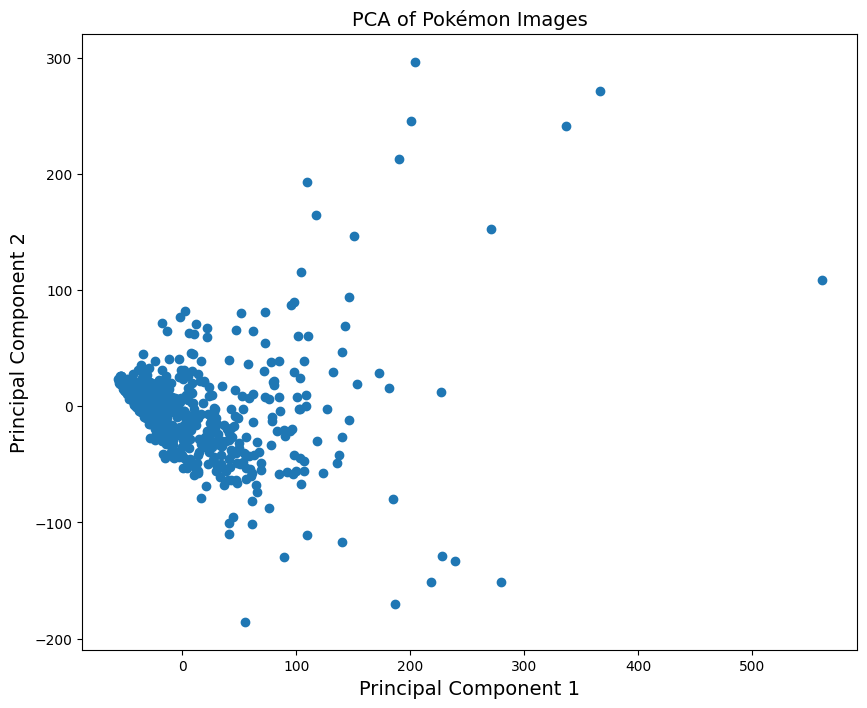

In [35]:
plt.figure(figsize=(10, 8))
plt.scatter(principal_components[:, 0], principal_components[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Pokémon Images')
plt.show()

# SVD

 SVD is a matrix factorization technique that decomposes a matrix into three other matrices. It is used in dimensionality reduction to identify and order the dimensions along which data points exhibit the most variation. In the context of SVD, these dimensions are singular vectors, and the amount of variance captured by each dimension is represented by a singular value.

 SVD can be applied to the same type of data as PCA. We will use the same image dataset

**Applying SVD**

In [36]:
from sklearn.decomposition import TruncatedSVD

n_components = 100  # You can change this number based on your needs
svd = TruncatedSVD(n_components=n_components)
svd_result = svd.fit_transform(scaled_image_data)

Variance Analysis:

In [39]:
print(svd.explained_variance_ratio_)
print("Total variance explained:", sum(svd.explained_variance_ratio_))

[0.09323463 0.04205165 0.04045248 0.03289482 0.02534352 0.02344845
 0.02199156 0.02146142 0.01840538 0.01726999 0.01560831 0.0151752
 0.0140856  0.01359154 0.01210374 0.01199149 0.01090371 0.01031363
 0.01014494 0.00958422 0.00906508 0.00888336 0.00880269 0.00817931
 0.00789921 0.00783282 0.00748767 0.00721543 0.0071166  0.00706617
 0.00673874 0.00670032 0.00646315 0.00622206 0.0060907  0.00597462
 0.00587458 0.00571682 0.00553543 0.00529645 0.00504479 0.0050337
 0.00469412 0.00460911 0.00455341 0.00445413 0.00432913 0.00432727
 0.00417588 0.00412241 0.00401534 0.00395655 0.00385736 0.00381974
 0.00372363 0.00367038 0.00354309 0.00349446 0.00335507 0.00328564
 0.00324686 0.00318176 0.00312728 0.00307526 0.00304014 0.00297045
 0.00294715 0.00287733 0.00285425 0.00281901 0.00275126 0.0027311
 0.00270265 0.0026738  0.00263086 0.00259219 0.00256758 0.00255279
 0.00247813 0.00240587 0.00238953 0.00232359 0.00227365 0.00226112
 0.00222993 0.00221746 0.00219396 0.00214202 0.00213094 0.0021077

Visualization

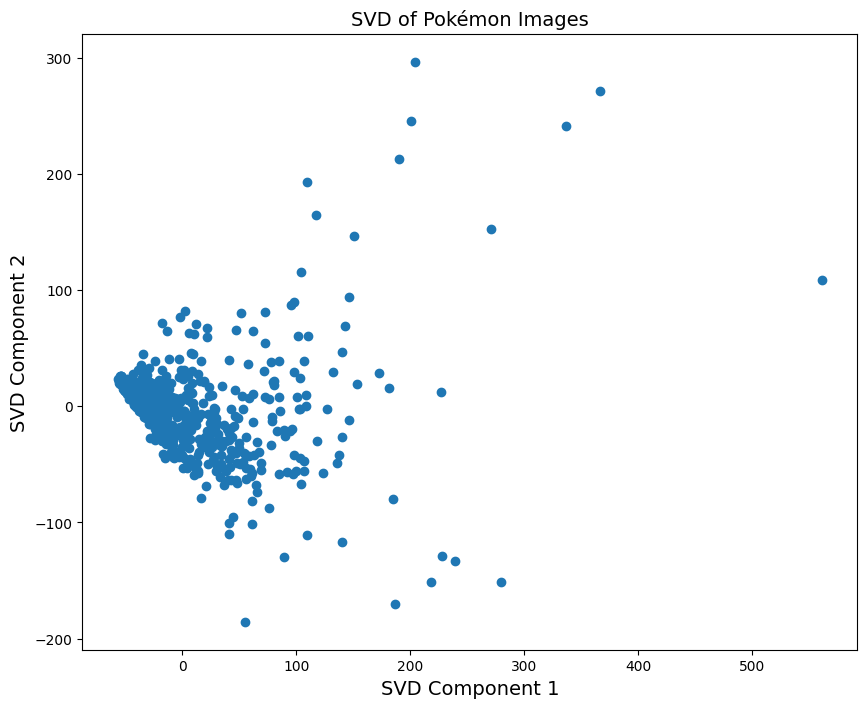

In [40]:
plt.figure(figsize=(10, 8))
plt.scatter(svd_result[:, 0], svd_result[:, 1])
plt.xlabel('SVD Component 1')
plt.ylabel('SVD Component 2')
plt.title('SVD of Pokémon Images')
plt.show()

# MDS

MDS is a technique used for visualizing the similarity or dissimilarity of data points in a dataset. It works by attempting to place each object in N-dimensional space such that the distances between objects are preserved as well as possible. MDS is particularly useful for exploring the underlying structure in the data when you have a dissimilarity matrix.

MDS is particularly effective with datasets where the relationships or distances between data points are of interest. It's suitable for this image dataset as it can help visualize the similarities or differences between Pokémon images in a lower-dimensional space.

**Applying MDS**

In [41]:
from sklearn.manifold import MDS

mds = MDS(n_components=2, random_state=42)
mds_result = mds.fit_transform(scaled_image_data)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


**Visualization**

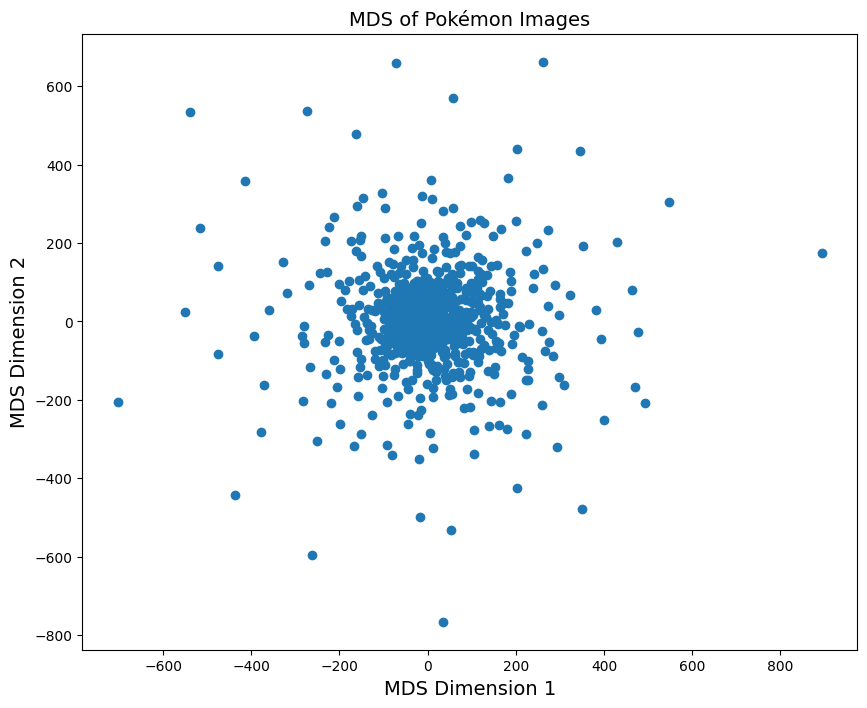

In [42]:
plt.figure(figsize=(10, 8))
plt.scatter(mds_result[:, 0], mds_result[:, 1])
plt.xlabel('MDS Dimension 1')
plt.ylabel('MDS Dimension 2')
plt.title('MDS of Pokémon Images')
plt.show()

# ISOMap

ISOMap is a non-linear dimensionality reduction method which is particularly effective for datasets where the data points lie on a curved manifold. It works by creating a graph of the nearest neighbors, estimating the geodesic distances between all pairs of points, and then embedding these points into a lower-dimensional space in a way that preserves these distances.

ISOMap works well with datasets where the intrinsic structure is expected to be nonlinear, such as images. For that reason we will use the same pokemon dataset again

**Applying IsoMap**

In [43]:
from sklearn.manifold import Isomap

isomap = Isomap(n_components=2, n_neighbors=5)  # Adjust n_neighbors as needed
isomap_result = isomap.fit_transform(scaled_image_data)

**Visualize**

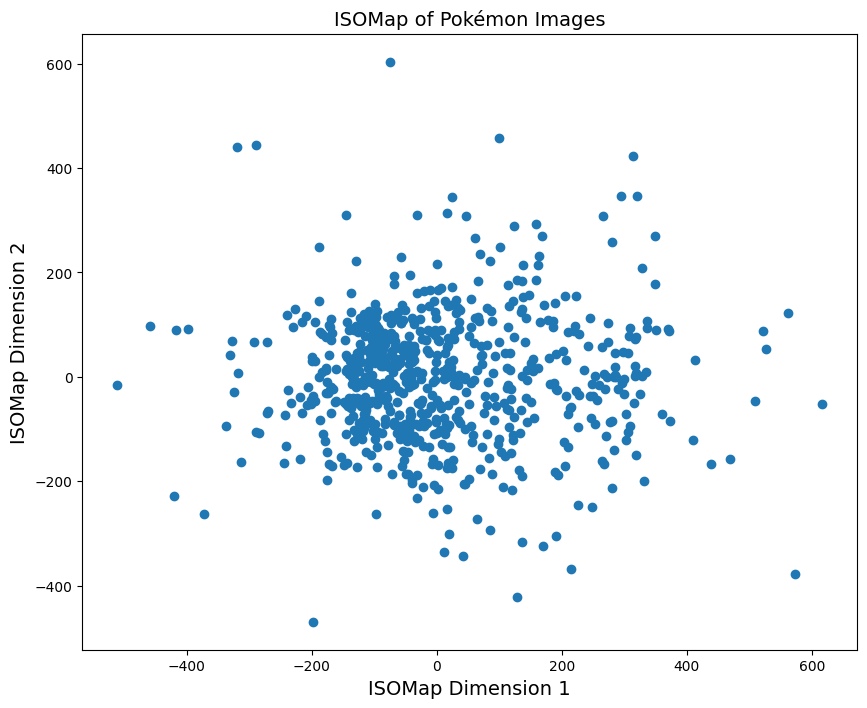

In [44]:
plt.figure(figsize=(10, 8))
plt.scatter(isomap_result[:, 0], isomap_result[:, 1])
plt.xlabel('ISOMap Dimension 1')
plt.ylabel('ISOMap Dimension 2')
plt.title('ISOMap of Pokémon Images')
plt.show()

# LLE

LLE is a non-linear reduction technique that computes low-dimensional, neighborhood-preserving embeddings of high-dimensional data. It works by first measuring how each data point linearly relates to its nearest neighbors, and then seeking a low-dimensional projection of the data that preserves these local relationships.

LLE is suitable for datasets like images where there might be non-linear relationships between data points. It works well when the data lies on a well-structured manifold and is especially good at unraveling twisted or folded data structures.

**Applying On our Dataset**

In [45]:
from sklearn.manifold import LocallyLinearEmbedding

n_neighbors = 10  # Can be adjusted
n_components = 2
lle = LocallyLinearEmbedding(n_neighbors=n_neighbors, n_components=n_components, method='standard')
lle_result = lle.fit_transform(scaled_image_data)

**Visualize**

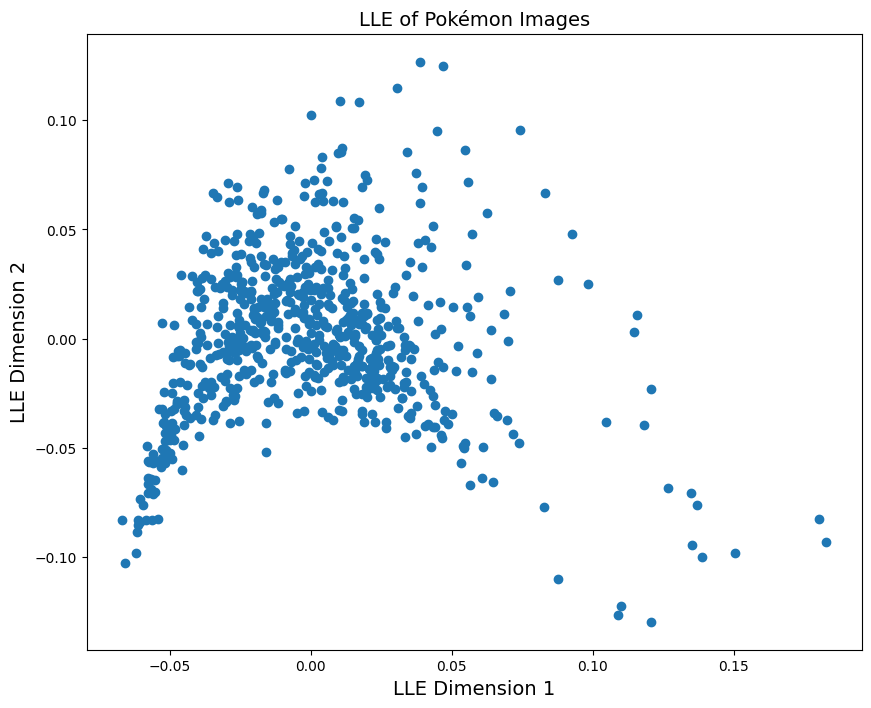

In [46]:
plt.figure(figsize=(10, 8))
plt.scatter(lle_result[:, 0], lle_result[:, 1])
plt.xlabel('LLE Dimension 1')
plt.ylabel('LLE Dimension 2')
plt.title('LLE of Pokémon Images')
plt.show()

# UMAP

UMAP is a non-linear dimensionality reduction technique that is particularly good at preserving both local and more global structures in the data. It works by constructing a high-dimensional graph representation of the data and then optimizing a low-dimensional graph to be as structurally similar as possible.

UMAP is versatile and can handle a wide range of data types, including image datasets like the one I have been using. It's especially good for datasets where the structure is complex and high-dimensional.

In [ ]:
# Install UMAP if you haven't already
!pip install umap-learn

In [48]:
import umap

umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
umap_result = umap_model.fit_transform(scaled_image_data)

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


**Visualization**

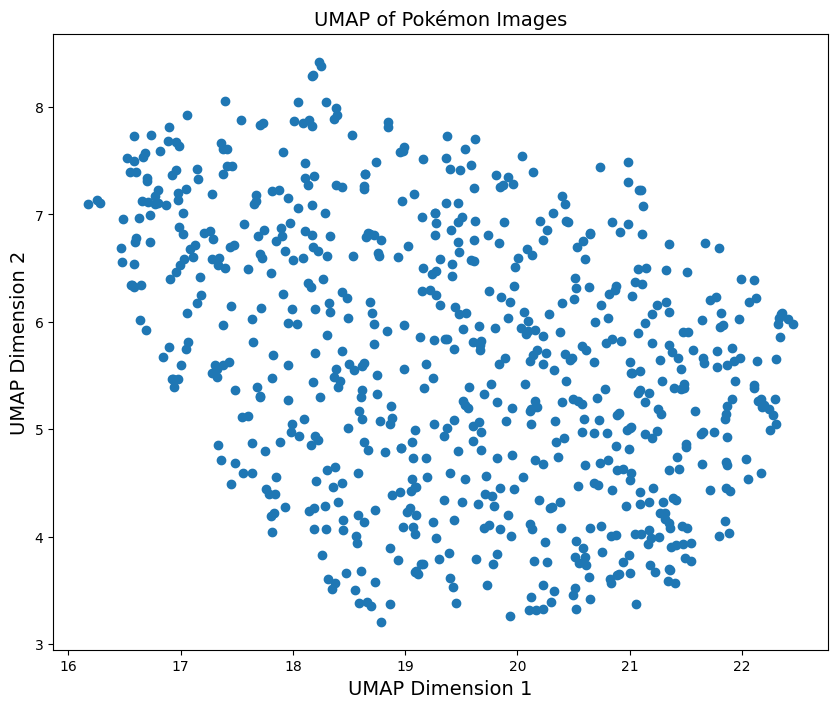

In [49]:
plt.figure(figsize=(10, 8))
plt.scatter(umap_result[:, 0], umap_result[:, 1])
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.title('UMAP of Pokémon Images')
plt.show()

# t-SNE

t-SNE is a tool for visualizing high-dimensional data by reducing it to two or three dimensions. It converts similarities between data points to joint probabilities and tries to minimize the divergence between these joint probabilities in the high-dimensional and low-dimensional space, making it particularly good at creating a visual representation of high-dimensional datasets.

t-SNE is particularly effective with complex datasets like images, where you want to visualize clusters or groups. It's excellent for revealing the structure of the data in a low-dimensional space.

**Applying t-SNE**

In [50]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, random_state=42)
tsne_result = tsne.fit_transform(scaled_image_data)

**Visualization**

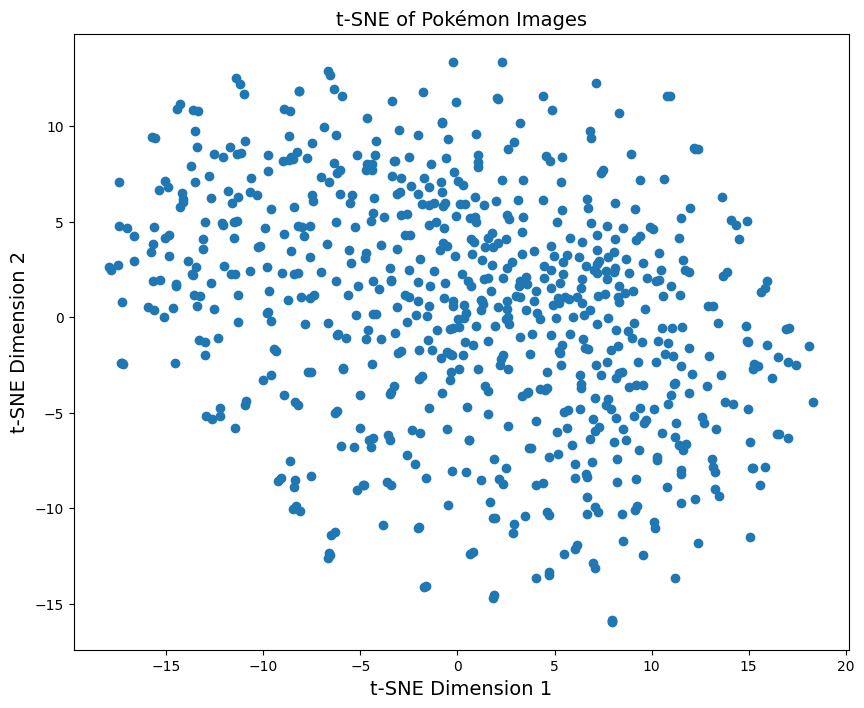

In [51]:
plt.figure(figsize=(10, 8))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1])
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('t-SNE of Pokémon Images')
plt.show()